# Connect to Drive


In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import os
file_dir = '/content/drive/MyDrive/Portofolio/DS Final Project/Modelling'
os.chdir(file_dir)

In [3]:
!ls

app_model.pkl  FINAL_PROJECT_TeamHore.ipynb	   target.csv
atribut.csv    healthcare-dataset-stroke-data.csv


# Import Library

In [4]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import RobustScaler
from imblearn.over_sampling import RandomOverSampler
from imblearn.combine import SMOTEENN
from sklearn.model_selection import GridSearchCV

from lightgbm import LGBMClassifier
from xgboost import XGBClassifier

from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression

from sklearn.ensemble import (
    GradientBoostingClassifier,
    RandomForestClassifier
)

from sklearn.metrics import (
    accuracy_score,
    make_scorer,
    recall_score,
    roc_auc_score,
    roc_curve,
    precision_score,
    f1_score,
    classification_report
)

from sklearn.model_selection import (
    KFold,
    train_test_split,
    GridSearchCV,
    cross_val_score
)

import statsmodels.api as sm

import warnings
warnings.simplefilter(action="ignore")

# Load Dataset

In [5]:
df = pd.read_csv('healthcare-dataset-stroke-data.csv')
df

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


## **ATTRIBUT INFORMATION**

1. id: unique identifier
2. gender: "Male", "Female" or "Other"
3. age: age of the patient
4. hypertension: 0 if the patient doesn't have hypertension, 1 if the patient has hypertension
5. heart_disease: 0 if the patient doesn't have any heart diseases, 1 if the patient has a heart disease
6. ever_married: "No" or "Yes"
7. work_type: "children", "Govt_jov", "Never_worked", "Private" or "Self-employed"
8. Residence_type: "Rural" or "Urban"
9. avg_glucose_level: average glucose level in blood
10. bmi: body mass index
11. smoking_status: "formerly smoked", "never smoked", "smokes" or "Unknown"
12. stroke: 1 if the patient had a stroke or 0 if not
*Note: "Unknown" in smoking_status means that the information is unavailable for this patient






In [7]:
df.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [8]:
df.loc[df['age'] == 0.08]

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
1614,47350,Female,0.08,0,0,No,children,Urban,139.67,14.1,Unknown,0
3295,29955,Male,0.08,0,0,No,children,Rural,70.33,16.9,Unknown,0


In [9]:
df['stroke'].value_counts()

0    4861
1     249
Name: stroke, dtype: int64

Terdapat **imbalance dataset**

In [10]:
df['smoking_status'].value_counts()

never smoked       1892
Unknown            1544
formerly smoked     885
smokes              789
Name: smoking_status, dtype: int64

In [11]:
df['gender'].value_counts()

Female    2994
Male      2115
Other        1
Name: gender, dtype: int64

Terdapat satu data gender yg other. Drop data gender other untuk tidak menggangu Model ML

In [12]:
df.gender.loc[(df['gender'] == 'Other')]

3116    Other
Name: gender, dtype: object

In [13]:
df = df[df['gender'] != 'Other']

df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [14]:
df.gender.loc[(df['gender'] == 'Other')].sum()

0

# Check Missing Values

In [15]:
df.isna().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

Ada Missing value pada data **BMI**

# Check Duplicated Values

In [16]:
df['id'].duplicated(keep=False)

0       False
1       False
2       False
3       False
4       False
        ...  
5105    False
5106    False
5107    False
5108    False
5109    False
Name: id, Length: 5109, dtype: bool

In [17]:
rows_with_different_ids = df[df['id'].duplicated(keep=False)]
print(rows_with_different_ids)

Empty DataFrame
Columns: [id, gender, age, hypertension, heart_disease, ever_married, work_type, Residence_type, avg_glucose_level, bmi, smoking_status, stroke]
Index: []


In [18]:
201/ len(df)

0.039342337052260715

In [19]:
df.bmi[df.bmi.isna()]

1      NaN
8      NaN
13     NaN
19     NaN
27     NaN
        ..
5039   NaN
5048   NaN
5093   NaN
5099   NaN
5105   NaN
Name: bmi, Length: 201, dtype: float64

Tidak ada data **Duplikat**

# Imputation :    

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5109 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5109 non-null   int64  
 1   gender             5109 non-null   object 
 2   age                5109 non-null   float64
 3   hypertension       5109 non-null   int64  
 4   heart_disease      5109 non-null   int64  
 5   ever_married       5109 non-null   object 
 6   work_type          5109 non-null   object 
 7   Residence_type     5109 non-null   object 
 8   avg_glucose_level  5109 non-null   float64
 9   bmi                4908 non-null   float64
 10  smoking_status     5109 non-null   object 
 11  stroke             5109 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 518.9+ KB


## Mean Imputation

In [21]:
from sklearn.impute import SimpleImputer
columns_to_impute = ['bmi']
df_mean = df.copy()
mean_imputer = SimpleImputer(strategy='mean')
df_mean[columns_to_impute] = mean_imputer.fit_transform(df[columns_to_impute])
df_mean

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.60000,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.89456,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.50000,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.40000,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.00000,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,28.89456,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.00000,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.60000,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.60000,formerly smoked,0


In [22]:
df_mean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5109 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5109 non-null   int64  
 1   gender             5109 non-null   object 
 2   age                5109 non-null   float64
 3   hypertension       5109 non-null   int64  
 4   heart_disease      5109 non-null   int64  
 5   ever_married       5109 non-null   object 
 6   work_type          5109 non-null   object 
 7   Residence_type     5109 non-null   object 
 8   avg_glucose_level  5109 non-null   float64
 9   bmi                5109 non-null   float64
 10  smoking_status     5109 non-null   object 
 11  stroke             5109 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 518.9+ KB


## Median Imputation

In [23]:
df_median = df.copy()
median_imputer = SimpleImputer(strategy='median')
df_median[columns_to_impute] = median_imputer.fit_transform(df[columns_to_impute])
df_median

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.1,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,28.1,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [24]:
df_median.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5109 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5109 non-null   int64  
 1   gender             5109 non-null   object 
 2   age                5109 non-null   float64
 3   hypertension       5109 non-null   int64  
 4   heart_disease      5109 non-null   int64  
 5   ever_married       5109 non-null   object 
 6   work_type          5109 non-null   object 
 7   Residence_type     5109 non-null   object 
 8   avg_glucose_level  5109 non-null   float64
 9   bmi                5109 non-null   float64
 10  smoking_status     5109 non-null   object 
 11  stroke             5109 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 518.9+ KB


## Mode Imputation

In [25]:
df_mode = df.copy()
mode_imputer = SimpleImputer(strategy='most_frequent')
df_mode[columns_to_impute] = mode_imputer.fit_transform(df[columns_to_impute])
df_mode

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.7,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,28.7,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [26]:
df_mode.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5109 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5109 non-null   int64  
 1   gender             5109 non-null   object 
 2   age                5109 non-null   float64
 3   hypertension       5109 non-null   int64  
 4   heart_disease      5109 non-null   int64  
 5   ever_married       5109 non-null   object 
 6   work_type          5109 non-null   object 
 7   Residence_type     5109 non-null   object 
 8   avg_glucose_level  5109 non-null   float64
 9   bmi                5109 non-null   float64
 10  smoking_status     5109 non-null   object 
 11  stroke             5109 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 518.9+ KB


## Imputing in Constant

In [27]:
df_constant = df.copy()
constant_imputer = SimpleImputer(strategy='constant', fill_value=0)
df_constant[columns_to_impute] = mean_imputer.fit_transform(df[columns_to_impute])
df_constant

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.60000,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.89456,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.50000,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.40000,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.00000,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,28.89456,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.00000,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.60000,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.60000,formerly smoked,0


In [28]:
df_constant.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5109 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5109 non-null   int64  
 1   gender             5109 non-null   object 
 2   age                5109 non-null   float64
 3   hypertension       5109 non-null   int64  
 4   heart_disease      5109 non-null   int64  
 5   ever_married       5109 non-null   object 
 6   work_type          5109 non-null   object 
 7   Residence_type     5109 non-null   object 
 8   avg_glucose_level  5109 non-null   float64
 9   bmi                5109 non-null   float64
 10  smoking_status     5109 non-null   object 
 11  stroke             5109 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 518.9+ KB


## Scatterplot in Imputation

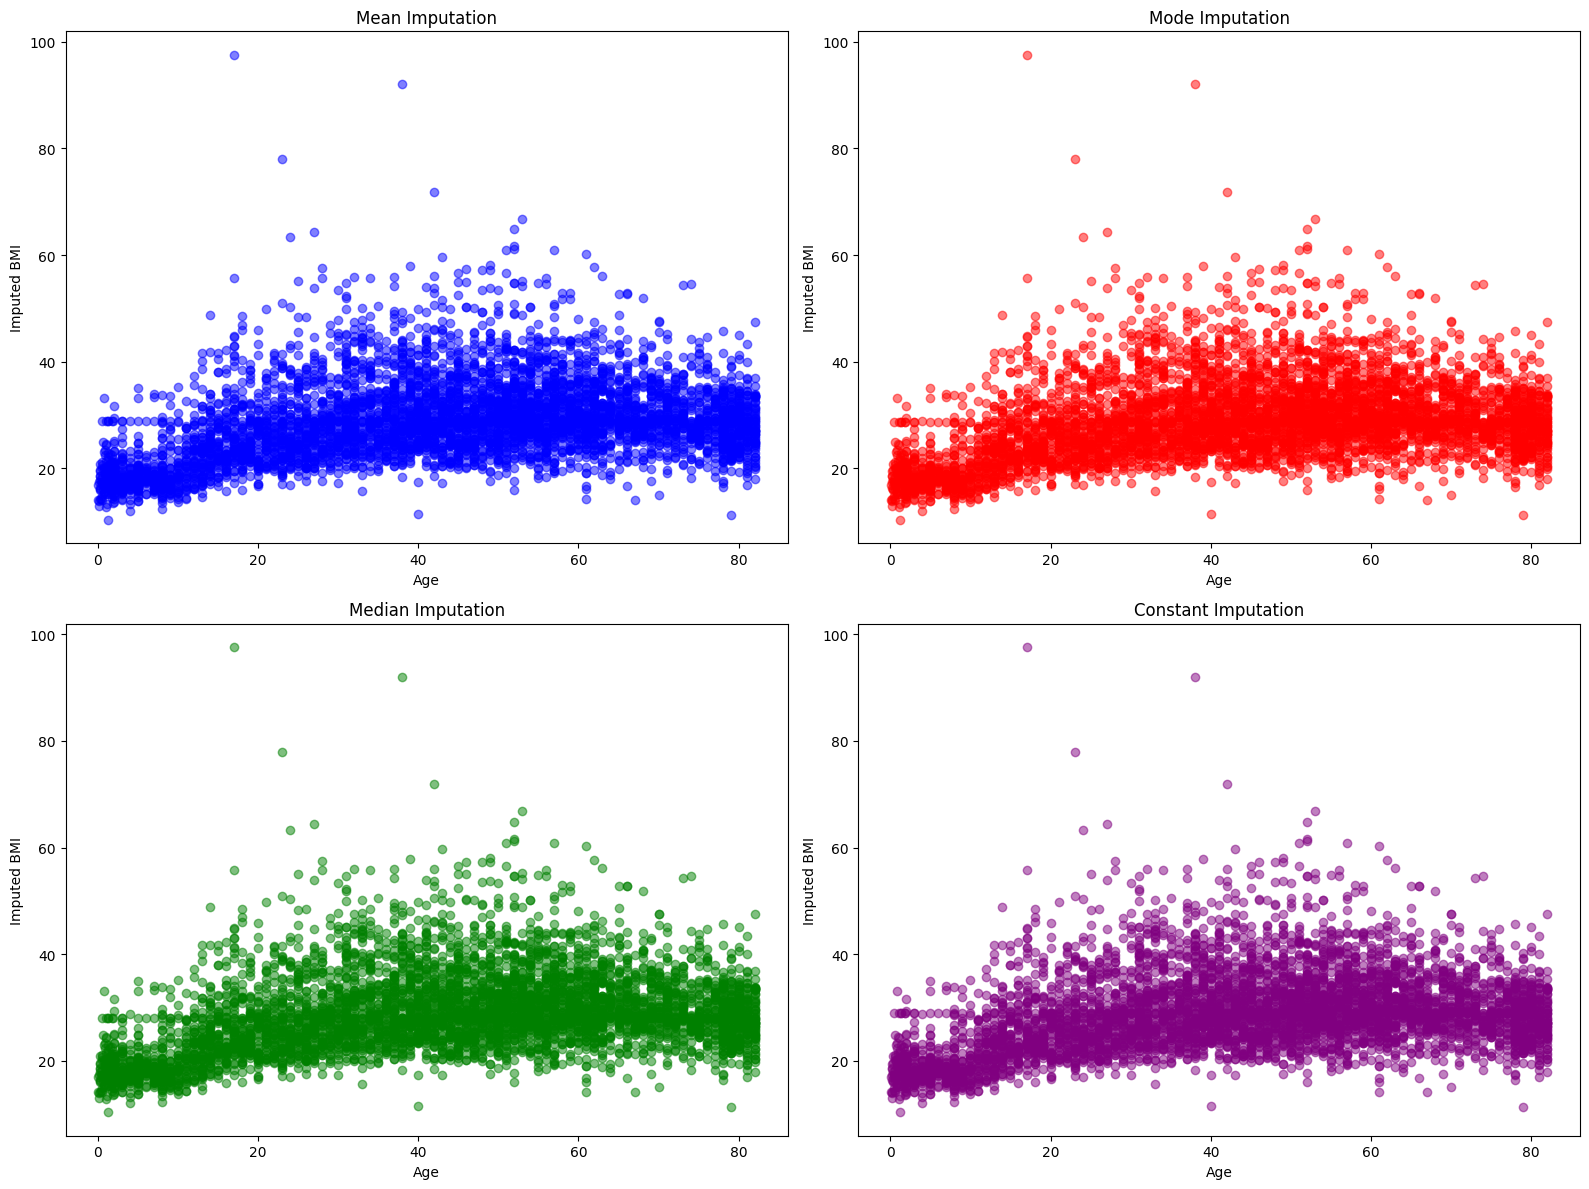

In [29]:
import matplotlib.pyplot as plt

plt.figure(figsize=(16, 12))


plt.subplot(2, 2, 1)
plt.scatter(df_mean['age'], df_mean['bmi'], alpha=0.5, c='blue')
plt.xlabel('Age')
plt.ylabel('Imputed BMI')
plt.title('Mean Imputation')

plt.subplot(2, 2, 2)
plt.scatter(df_mode['age'], df_mode['bmi'], alpha=0.5, c='red')
plt.xlabel('Age')
plt.ylabel('Imputed BMI')
plt.title('Mode Imputation')

plt.subplot(2, 2, 3)
plt.scatter(df_median['age'], df_median['bmi'], alpha=0.5, c='green')
plt.xlabel('Age')
plt.ylabel('Imputed BMI')
plt.title('Median Imputation')

plt.subplot(2, 2, 4)
plt.scatter(df_constant['age'], df_constant['bmi'], alpha=0.5, c='purple')
plt.xlabel('Age')
plt.ylabel('Imputed BMI')
plt.title('Constant Imputation')

plt.tight_layout()
plt.show()

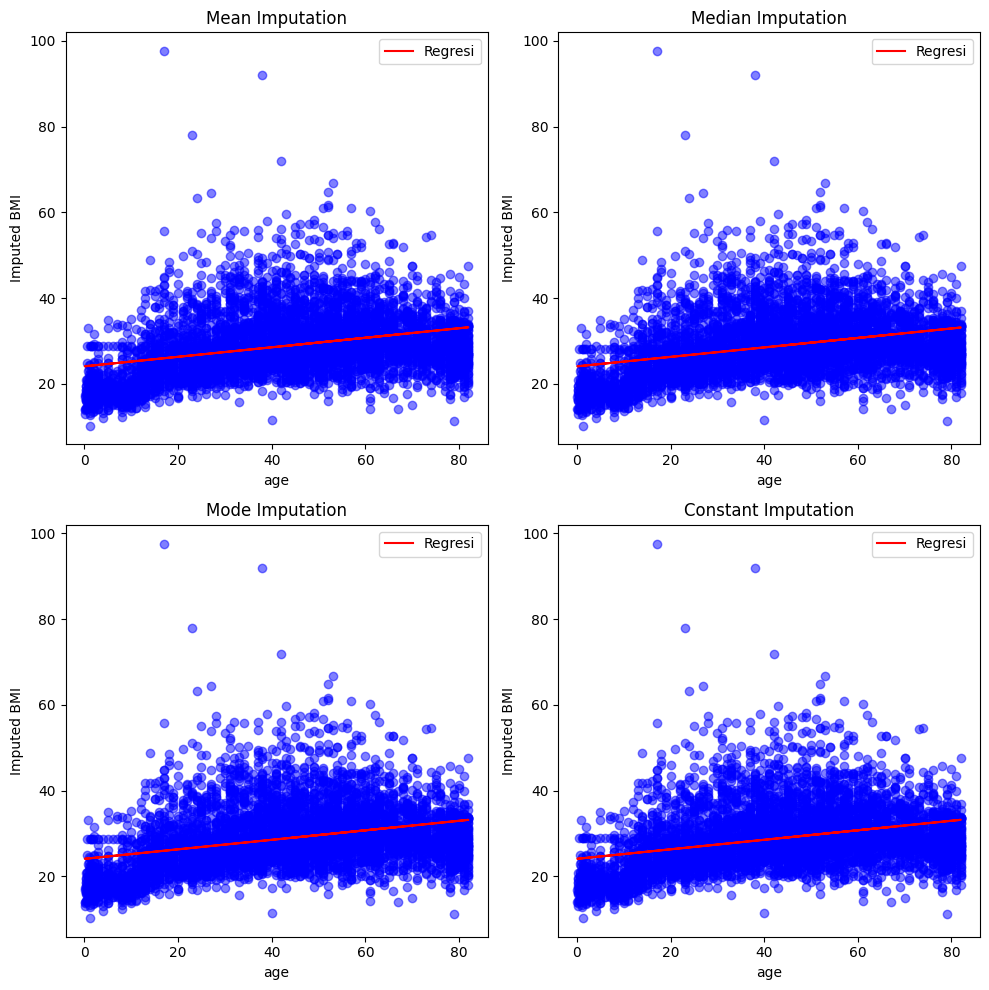

In [30]:
from scipy.stats import linregress


fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 10))

imputations = {
    'Mean Imputation': df_mean,
    'Median Imputation': df_median,
    'Mode Imputation': df_mode,
    'Constant Imputation': df_constant
}

for ax, imputation_label in zip(axes.flatten(), imputations):
    imputation_data = imputations[imputation_label]
    ax.scatter(imputation_data['age'], imputation_data['bmi'], alpha=0.5, c='blue')
    ax.set_xlabel('age')
    ax.set_ylabel('Imputed BMI')
    ax.set_title(imputation_label)


    x = imputation_data['age']
    y = imputation_data['bmi']
    slope, intercept, r_value, p_value, std_err = linregress(x, y)
    ax.plot(x, intercept + slope * x, color='red', label='Regresi')
    ax.legend()

plt.tight_layout()
plt.show()

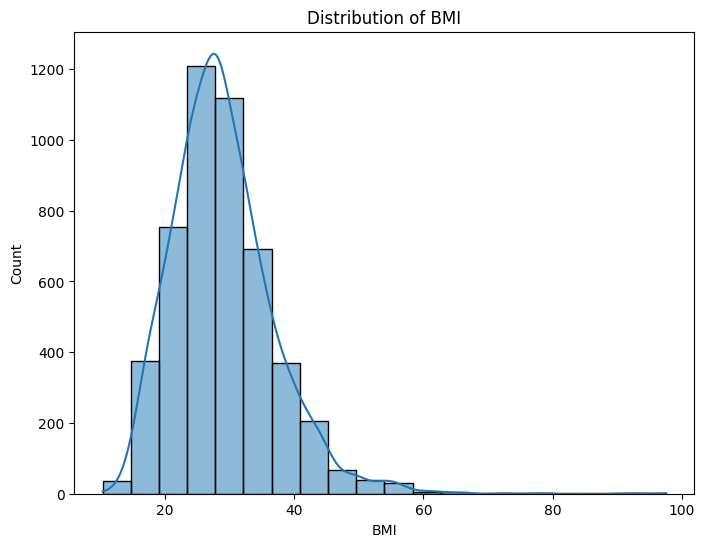

In [31]:
plt.figure(figsize=(8, 6))
sns.histplot(df['bmi'], bins=20, kde=True)
plt.xlabel('BMI')
plt.ylabel('Count')
plt.title('Distribution of BMI')
plt.show()

Distribution data BMI sedikit menceng ke kanan, Berarti tdk disarankan menggunakan Imputasi dengan Mean

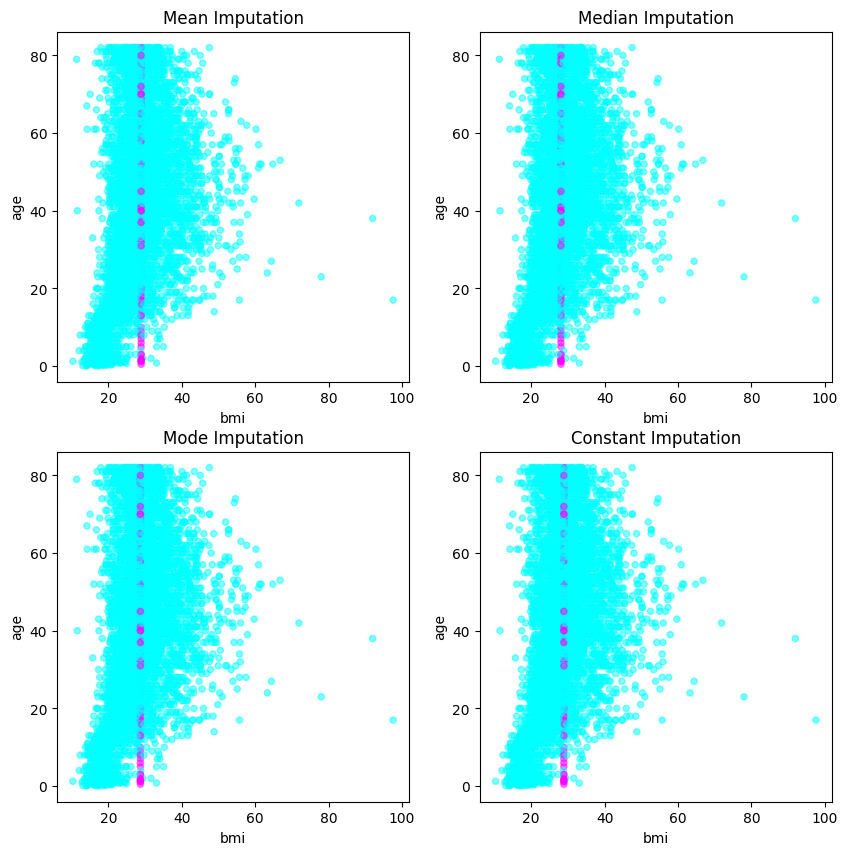

In [32]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 10))
nullity = df['bmi'].isnull()
imputations = {
   'Mean Imputation': df_mean,
    'Median Imputation': df_median,
    'Mode Imputation': df_mode,
    'Constant Imputation': df_constant
}

for ax, df_key in zip(axes.flatten(), imputations):
    imputed_data = imputations[df_key]
    imputed_data.plot(
        x='bmi',
        y='age',
        kind='scatter',
        alpha=0.5,
        c=nullity,
        cmap='cool',
        ax=ax,
        colorbar=False,
        title=df_key
    )

plt.show()

Imputasi dengan median dan mode terlihat lebih bagus namun karena ini data numerik jadi menggunakan **median**

In [33]:
df = df.drop(columns='id', axis=1)

In [34]:
df

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...
5105,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5109 entries, 0 to 5109
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             5109 non-null   object 
 1   age                5109 non-null   float64
 2   hypertension       5109 non-null   int64  
 3   heart_disease      5109 non-null   int64  
 4   ever_married       5109 non-null   object 
 5   work_type          5109 non-null   object 
 6   Residence_type     5109 non-null   object 
 7   avg_glucose_level  5109 non-null   float64
 8   bmi                4908 non-null   float64
 9   smoking_status     5109 non-null   object 
 10  stroke             5109 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 479.0+ KB


In [36]:
df.describe()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5109.000000,5109.000000,5109.000000,5109.000000,4908.00000,5109.000000
mean,43.229986,0.097475,0.054022,106.140399,28.89456,0.048738
std,22.613575,0.296633,0.226084,45.285004,7.85432,0.215340
min,0.080000,0.000000,0.000000,55.120000,10.30000,0.000000
25%,25.000000,0.000000,0.000000,77.240000,23.50000,0.000000
50%,45.000000,0.000000,0.000000,91.880000,28.10000,0.000000
75%,61.000000,0.000000,0.000000,114.090000,33.10000,0.000000
max,82.000000,1.000000,1.000000,271.740000,97.60000,1.000000


# Exploratory Data Analysis (EDA)

## Age Distribution

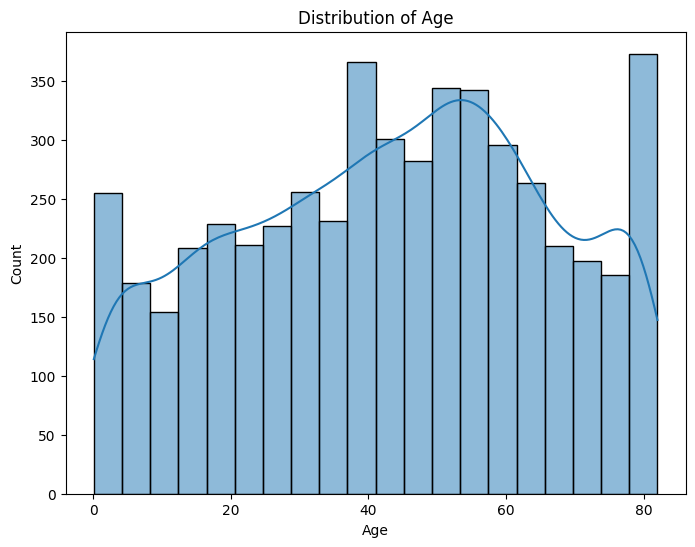

In [37]:
plt.figure(figsize=(8, 6))
sns.histplot(df['age'], bins=20, kde=True)
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Distribution of Age')
plt.show()

## Work Type Distribution

In [38]:
work_type_counts = df['work_type'].value_counts()

In [39]:
work_type_counts

Private          2924
Self-employed     819
children          687
Govt_job          657
Never_worked       22
Name: work_type, dtype: int64

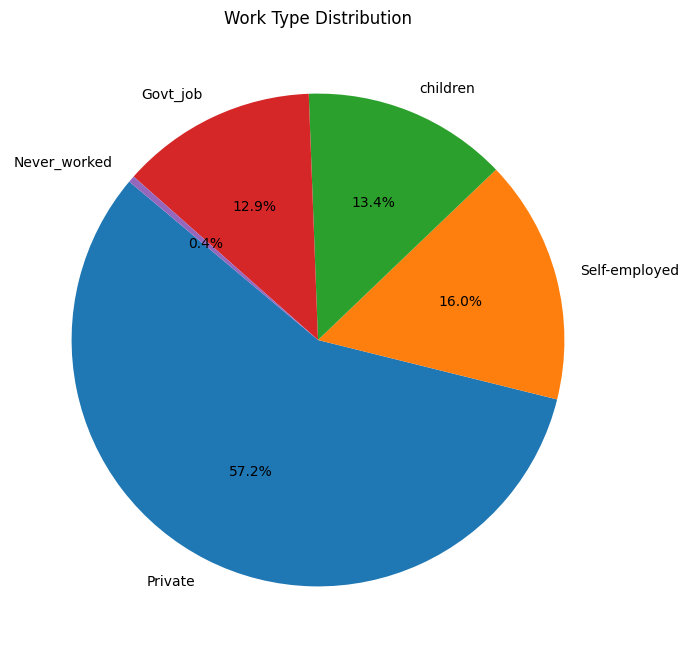

In [40]:
plt.figure(figsize=(8, 8))
plt.pie(work_type_counts, labels=work_type_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Work Type Distribution')
plt.show()

## The gender that suffers the most strokes

In [41]:
gender_stroke_counts = df[df['stroke'] == 1]['gender'].value_counts()

In [42]:
gender_stroke_counts

Female    141
Male      108
Name: gender, dtype: int64

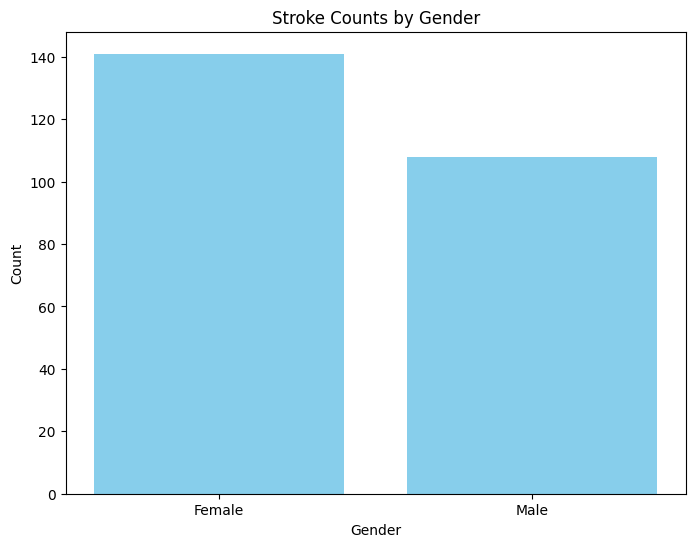

In [43]:
plt.figure(figsize=(8, 6))
plt.bar(gender_stroke_counts.index, gender_stroke_counts.values, color='skyblue')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Stroke Counts by Gender')
plt.show()

## Stroke counts for Smokers by genders

In [44]:
gender_stroke_whos_smokes = df[(df['stroke'] == 1) & (df['smoking_status'] == 'smokes')]['gender'].value_counts()

In [45]:
gender_stroke_whos_smokes

Male      23
Female    19
Name: gender, dtype: int64

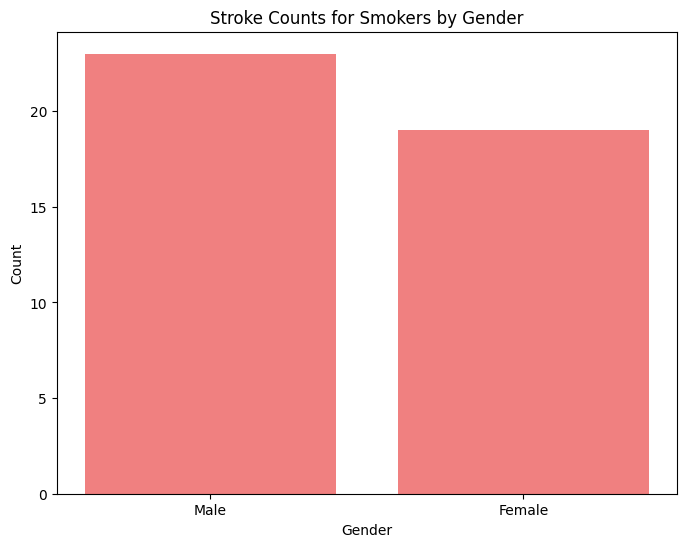

In [46]:
plt.figure(figsize=(8, 6))
plt.bar(gender_stroke_whos_smokes.index, gender_stroke_whos_smokes.values, color='lightcoral')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Stroke Counts for Smokers by Gender')
plt.show()

## Correlation Matrix

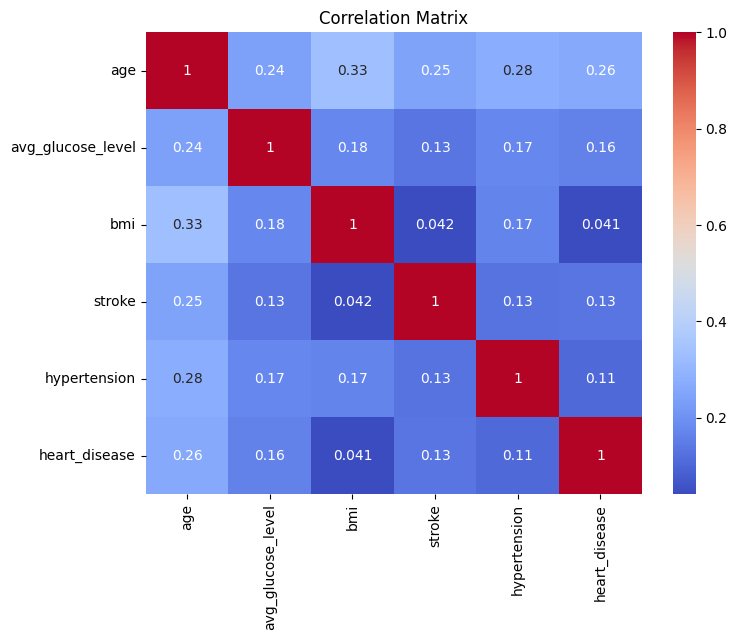

In [47]:
correlation_matrix = df[['age', 'avg_glucose_level', 'bmi', 'stroke', 'hypertension',	'heart_disease']].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

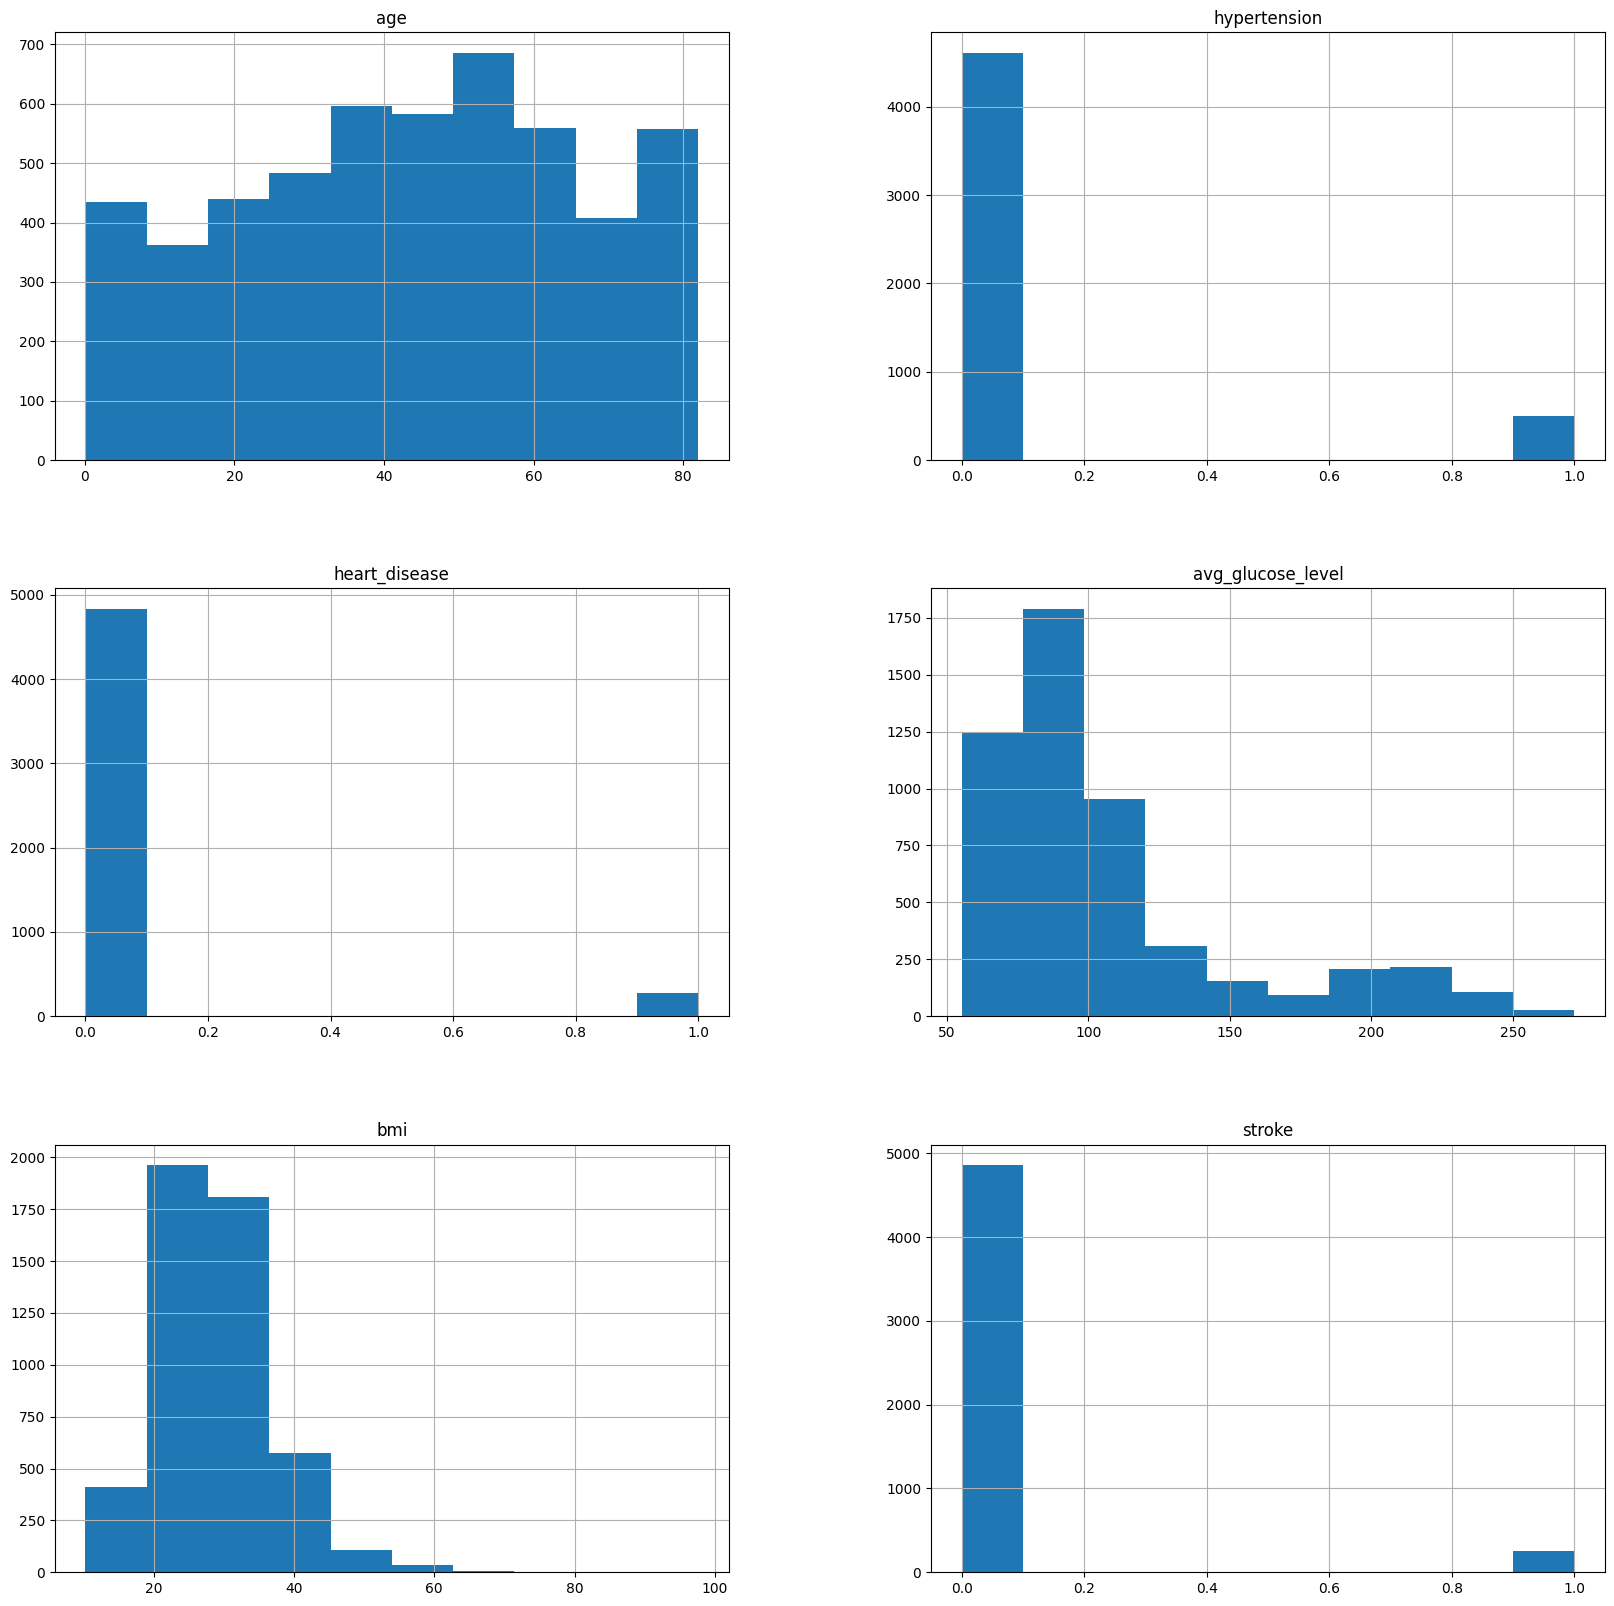

In [48]:
df.hist(figsize = (20,20));

# Data Prepocessing

In [49]:
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5109 entries, 0 to 5109
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             5109 non-null   object 
 1   age                5109 non-null   float64
 2   hypertension       5109 non-null   int64  
 3   heart_disease      5109 non-null   int64  
 4   ever_married       5109 non-null   object 
 5   work_type          5109 non-null   object 
 6   Residence_type     5109 non-null   object 
 7   avg_glucose_level  5109 non-null   float64
 8   bmi                4908 non-null   float64
 9   smoking_status     5109 non-null   object 
 10  stroke             5109 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 479.0+ KB


## Fix Missing Value

In [51]:
# We can fill in NaN values with a median according to the target
stroke_0_median = df[df["stroke"] == 0]["bmi"].median()
stroke_1_median = df[df["stroke"] == 1]["bmi"].median()

df.loc[(df["stroke"] == 0) & (df["bmi"].isnull()), "bmi"] = stroke_0_median
df.loc[(df["stroke"] == 1) & (df["bmi"].isnull()), "bmi"] = stroke_1_median


In [52]:
df.columns.isnull().sum()

0

## Fix Outlier

In [53]:
#Membuat fungsi thresholds untuk outlier
def outlier_thresholds(dataframe, variable):
    quartile1 = dataframe[variable].quantile(0.10)
    quartile3 = dataframe[variable].quantile(0.90)
    interquantile_range = quartile3 - quartile1
    up_limit = quartile3 + 1.5 * interquantile_range
    low_limit = quartile1 - 1.5 * interquantile_range
    return low_limit, up_limit

In [54]:
#Membuat fungsi melihat column yg memiliki outlier
def has_outliers(dataframe, variable):
    low_limit, up_limit = outlier_thresholds(dataframe, variable)
    if dataframe[(dataframe[variable] < low_limit) | (dataframe[variable] > up_limit)].any(axis=None):
        print(variable, "yes")

In [55]:
for column in df.columns:
  if df[column].dtype in ['int', 'float']:
        has_outliers(df, column)

hypertension yes
heart_disease yes
bmi yes
stroke yes


Abaikan column yg merupakan binner. Terdapat Outlier pada data **BMI**

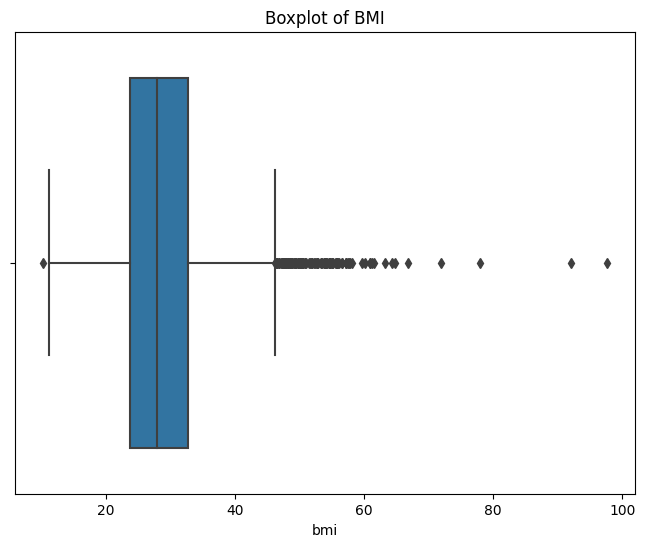

In [56]:
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x='bmi')
plt.title('Boxplot of BMI')
plt.show()

In [57]:
#Menanggulangi Outlier dengan menekan nilai outliers
quartile1 = df['bmi'].quantile(0.10)
quartile3 = df['bmi'].quantile(0.90)
interquartile_range = quartile3 - quartile1
up_limit = quartile3 + 1.5 * interquartile_range
low_limit = quartile1 - 1.5 * interquartile_range

df.loc[(df['bmi'] < low_limit), 'bmi'] = low_limit
df.loc[(df['bmi'] > up_limit), 'bmi'] = up_limit

In [58]:
for column in df.columns:
  if df[column].dtype in ['int', 'float']:
        has_outliers(df, column)

hypertension yes
heart_disease yes
stroke yes


Penanggulangan Outlier sukses

In [59]:
df.describe(
    percentiles=[0.05, 0.25, 0.50, 0.75, 0.90, 0.95, 0.99]).T

,count,mean,std,min,5%,25%,50%,75%,90%,95%,99%,max
age,5109.0,43.229986,22.613575,0.08,5.000,25.00,45.00,61.00,75.000,79.000,82.0000,82.00
hypertension,5109.0,0.097475,0.296633,0.00,0.000,0.00,0.00,0.00,0.000,1.000,1.0000,1.00
heart_disease,5109.0,0.054022,0.226084,0.00,0.000,0.00,0.00,0.00,0.000,1.000,1.0000,1.00
avg_glucose_level,5109.0,106.140399,45.285004,55.12,60.712,77.24,91.88,114.09,192.202,216.304,240.7084,271.74
bmi,5109.0,28.858626,7.608340,10.30,17.700,23.80,28.00,32.80,38.700,42.660,52.8920,66.93
stroke,5109.0,0.048738,0.215340,0.00,0.000,0.00,0.00,0.00,0.000,0.000,1.0000,1.00


# Feature Engineering

In [60]:
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,29.7,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [61]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5109 entries, 0 to 5109
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             5109 non-null   object 
 1   age                5109 non-null   float64
 2   hypertension       5109 non-null   int64  
 3   heart_disease      5109 non-null   int64  
 4   ever_married       5109 non-null   object 
 5   work_type          5109 non-null   object 
 6   Residence_type     5109 non-null   object 
 7   avg_glucose_level  5109 non-null   float64
 8   bmi                5109 non-null   float64
 9   smoking_status     5109 non-null   object 
 10  stroke             5109 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 479.0+ KB


## Encoding

In [62]:
label_column = ['gender', 'ever_married', 'Residence_type']

label_encoder = LabelEncoder()

for col in label_column:
    df[col] = label_encoder.fit_transform(df[col])

In [63]:
df.tail()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
5105,0,80.0,1,0,1,Private,1,83.75,28.0,never smoked,0
5106,0,81.0,0,0,1,Self-employed,1,125.20,40.0,never smoked,0
5107,0,35.0,0,0,1,Self-employed,0,82.99,30.6,never smoked,0
5108,1,51.0,0,0,1,Private,0,166.29,25.6,formerly smoked,0
5109,0,44.0,0,0,1,Govt_job,1,85.28,26.2,Unknown,0


In [64]:
#Membuat fungsi Encoding
def one_hot_encode(dataframe, columns, drop_first=False, prefix_sep='_'):
    """
    Melakukan one-hot encoding pada kolom kategorikal dalam DataFrame.

    Args:
        dataframe (DataFrame): DataFrame yang akan diencode.
        columns (list): Daftar nama kolom kategorikal yang akan diencode.
        drop_first (bool): Jika True, akan menghapus kolom pertama dalam setiap kolom yang di-encode.
        prefix_sep (str): Pemisah untuk menambahkan prefiks pada nama kolom yang di-encode.

    Returns:
        DataFrame: DataFrame yang telah diencode dengan kolom-kolom baru.
    """
    df_encoded = pd.get_dummies(
        dataframe,
        columns=columns,
        drop_first=drop_first,
        prefix=columns,
        prefix_sep=prefix_sep)
    return df_encoded

In [65]:
column_categoric = ['work_type', 'smoking_status']

In [66]:
encoded_df = one_hot_encode(df, column_categoric)
encoded_df

,gender,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi,stroke,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,1,67.0,0,1,1,1,228.69,36.6,1,0,0,1,0,0,0,1,0,0
1,0,61.0,0,0,1,0,202.21,29.7,1,0,0,0,1,0,0,0,1,0
2,1,80.0,0,1,1,0,105.92,32.5,1,0,0,1,0,0,0,0,1,0
3,0,49.0,0,0,1,1,171.23,34.4,1,0,0,1,0,0,0,0,0,1
4,0,79.0,1,0,1,0,174.12,24.0,1,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5105,0,80.0,1,0,1,1,83.75,28.0,0,0,0,1,0,0,0,0,1,0
5106,0,81.0,0,0,1,1,125.20,40.0,0,0,0,0,1,0,0,0,1,0
5107,0,35.0,0,0,1,0,82.99,30.6,0,0,0,0,1,0,0,0,1,0
5108,1,51.0,0,0,1,0,166.29,25.6,0,0,0,1,0,0,0,1,0,0


In [67]:
encoded_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5109 entries, 0 to 5109
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   gender                          5109 non-null   int64  
 1   age                             5109 non-null   float64
 2   hypertension                    5109 non-null   int64  
 3   heart_disease                   5109 non-null   int64  
 4   ever_married                    5109 non-null   int64  
 5   Residence_type                  5109 non-null   int64  
 6   avg_glucose_level               5109 non-null   float64
 7   bmi                             5109 non-null   float64
 8   stroke                          5109 non-null   int64  
 9   work_type_Govt_job              5109 non-null   uint8  
 10  work_type_Never_worked          5109 non-null   uint8  
 11  work_type_Private               5109 non-null   uint8  
 12  work_type_Self-employed         51

In [68]:
encoded_df.shape

(5109, 18)

In [69]:
encoded_df.columns

Index(['gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'Residence_type', 'avg_glucose_level', 'bmi', 'stroke',
       'work_type_Govt_job', 'work_type_Never_worked', 'work_type_Private',
       'work_type_Self-employed', 'work_type_children',
       'smoking_status_Unknown', 'smoking_status_formerly smoked',
       'smoking_status_never smoked', 'smoking_status_smokes'],
      dtype='object')

In [70]:
#Menggabungkan dataframe asli dengan dataframe encode
df = pd.concat([df, encoded_df[encoded_df.columns.difference(df.columns)]], axis=1)

In [71]:
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children
0,1,67.0,0,1,1,Private,1,228.69,36.6,formerly smoked,1,0,1,0,0,0,0,1,0,0
1,0,61.0,0,0,1,Self-employed,0,202.21,29.7,never smoked,1,0,0,1,0,0,0,0,1,0
2,1,80.0,0,1,1,Private,0,105.92,32.5,never smoked,1,0,0,1,0,0,0,1,0,0
3,0,49.0,0,0,1,Private,1,171.23,34.4,smokes,1,0,0,0,1,0,0,1,0,0
4,0,79.0,1,0,1,Self-employed,0,174.12,24.0,never smoked,1,0,0,1,0,0,0,0,1,0


In [72]:
df.shape

(5109, 20)

In [73]:
df.columns

Index(['gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke', 'smoking_status_Unknown',
       'smoking_status_formerly smoked', 'smoking_status_never smoked',
       'smoking_status_smokes', 'work_type_Govt_job', 'work_type_Never_worked',
       'work_type_Private', 'work_type_Self-employed', 'work_type_children'],
      dtype='object')

## Scalling

In [74]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5109 entries, 0 to 5109
Data columns (total 20 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   gender                          5109 non-null   int64  
 1   age                             5109 non-null   float64
 2   hypertension                    5109 non-null   int64  
 3   heart_disease                   5109 non-null   int64  
 4   ever_married                    5109 non-null   int64  
 5   work_type                       5109 non-null   object 
 6   Residence_type                  5109 non-null   int64  
 7   avg_glucose_level               5109 non-null   float64
 8   bmi                             5109 non-null   float64
 9   smoking_status                  5109 non-null   object 
 10  stroke                          5109 non-null   int64  
 11  smoking_status_Unknown          5109 non-null   uint8  
 12  smoking_status_formerly smoked  51

In [75]:
numeric_columns = ['avg_glucose_level', 'bmi', 'age']

Text(0.5, 1.0, 'Box Plot Sebelum Scaling')

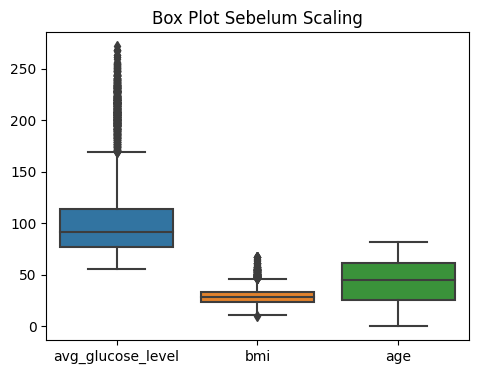

In [76]:
#Gambaran column numerik sebelun di Scalling
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
sns.boxplot(data=df[numeric_columns])
plt.title('Box Plot Sebelum Scaling')

In [77]:
#Membuat fungsi Scalling
def robust_scale(dataframe, numeric_columns):
    """Melakukan robust scaling pada kolom numerik dalam DataFrame.

    Args:
        dataframe (DataFrame): DataFrame yang akan di-scale secara robust.
        numeric_columns (list): Daftar nama kolom numerik yang akan di-scale.

    Returns:
        DataFrame: DataFrame yang telah di-scale secara robust.
    """
    scaler = RobustScaler()
    dataframe[numeric_columns] = scaler.fit_transform(dataframe[numeric_columns])
    return dataframe

In [78]:
df = robust_scale(df, numeric_columns)

df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children
0,1,0.611111,0,1,1,Private,1,3.712619,0.955556,formerly smoked,1,0,1,0,0,0,0,1,0,0
1,0,0.444444,0,0,1,Self-employed,0,2.994030,0.188889,never smoked,1,0,0,1,0,0,0,0,1,0
2,1,0.972222,0,1,1,Private,0,0.381004,0.500000,never smoked,1,0,0,1,0,0,0,1,0,0
3,0,0.111111,0,0,1,Private,1,2.153324,0.711111,smokes,1,0,0,0,1,0,0,1,0,0
4,0,0.944444,1,0,1,Self-employed,0,2.231750,-0.444444,never smoked,1,0,0,1,0,0,0,0,1,0


Text(0.5, 1.0, 'Box Plot Setelah Scaling')

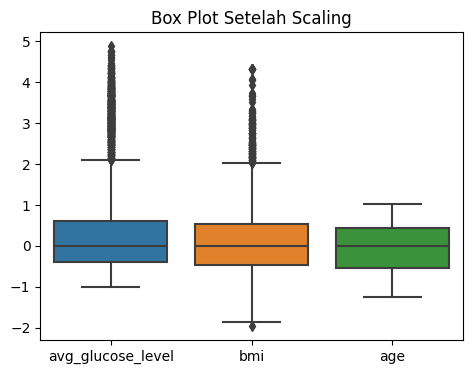

In [79]:
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
sns.boxplot(data=df[numeric_columns])
plt.title('Box Plot Setelah Scaling')

In [80]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5109 entries, 0 to 5109
Data columns (total 20 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   gender                          5109 non-null   int64  
 1   age                             5109 non-null   float64
 2   hypertension                    5109 non-null   int64  
 3   heart_disease                   5109 non-null   int64  
 4   ever_married                    5109 non-null   int64  
 5   work_type                       5109 non-null   object 
 6   Residence_type                  5109 non-null   int64  
 7   avg_glucose_level               5109 non-null   float64
 8   bmi                             5109 non-null   float64
 9   smoking_status                  5109 non-null   object 
 10  stroke                          5109 non-null   int64  
 11  smoking_status_Unknown          5109 non-null   uint8  
 12  smoking_status_formerly smoked  51

In [81]:
columns_to_drop = ['work_type', 'smoking_status', 'Residence_type']

# Drop the specified columns
df = df.drop(columns=columns_to_drop)

In [82]:
df.shape

(5109, 17)

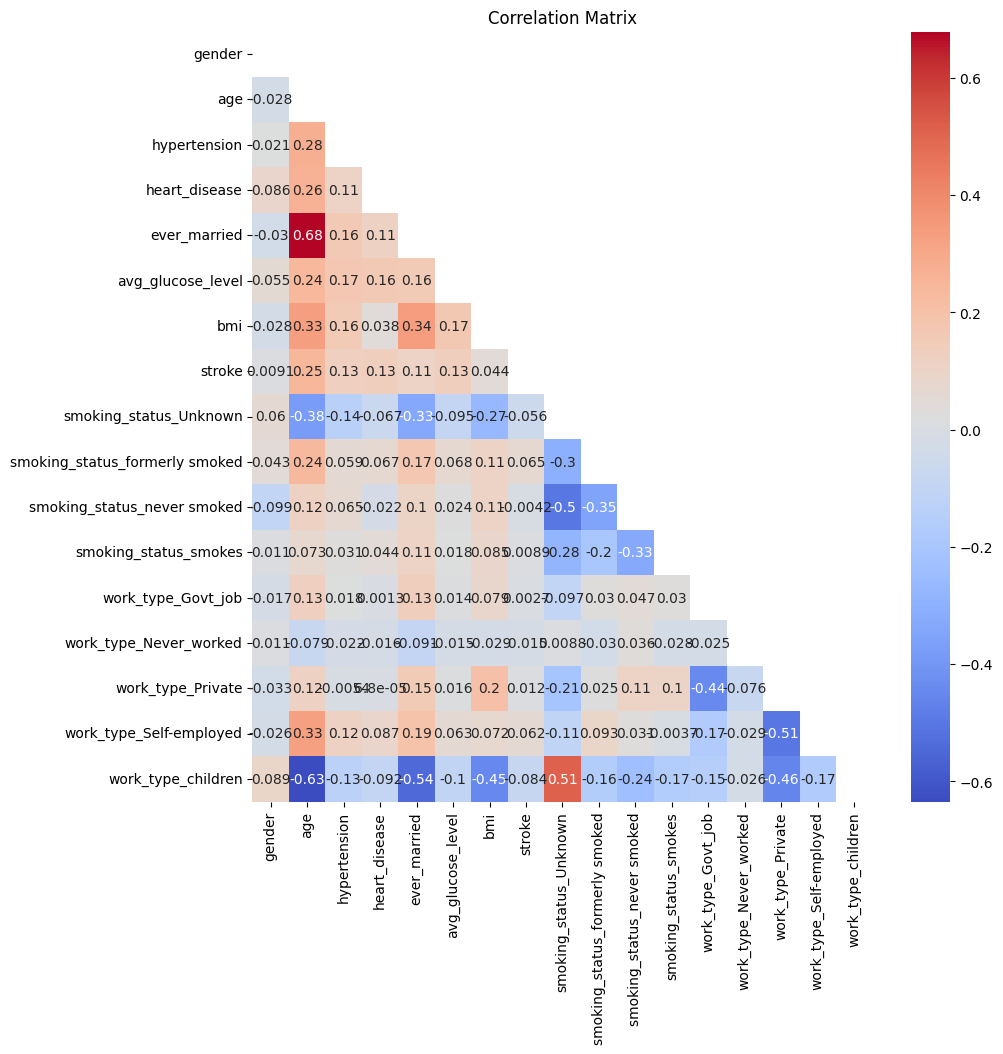

In [83]:
correlation_matrix = df.corr()

# Create a mask to hide the upper triangle (redundant values)
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

plt.figure(figsize=(10, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', mask=mask)
plt.title('Correlation Matrix')
plt.show()

# Modeling

## Split Dataset

In [84]:
df.head()

,gender,age,hypertension,heart_disease,ever_married,avg_glucose_level,bmi,stroke,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children
0,1,0.611111,0,1,1,3.712619,0.955556,1,0,1,0,0,0,0,1,0,0
1,0,0.444444,0,0,1,2.994030,0.188889,1,0,0,1,0,0,0,0,1,0
2,1,0.972222,0,1,1,0.381004,0.500000,1,0,0,1,0,0,0,1,0,0
3,0,0.111111,0,0,1,2.153324,0.711111,1,0,0,0,1,0,0,1,0,0
4,0,0.944444,1,0,1,2.231750,-0.444444,1,0,0,1,0,0,0,0,1,0


In [85]:
X = df.drop("stroke", axis=1)
y = df["stroke"]

# Split train-test data
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.20,
                                                    stratify=y,
                                                    random_state=42)

In [86]:
# Define oversampling strategy
oversample = SMOTEENN()

# Fit and apply the transform
X_train_over, y_train_over = oversample.fit_resample(X_train, y_train)

Exception ignored on calling ctypes callback function: <function ThreadpoolController._find_libraries_with_dl_iterate_phdr.<locals>.match_library_callback at 0x78678d70eef0>
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/threadpoolctl.py", line 847, in match_library_callback
    self._make_controller_from_path(filepath)
  File "/usr/local/lib/python3.10/dist-packages/threadpoolctl.py", line 945, in _make_controller_from_path
    filepath = _realpath(filepath)
  File "/usr/local/lib/python3.10/dist-packages/threadpoolctl.py", line 396, in _realpath
    return os.path.realpath(filepath)
  File "/usr/lib/python3.10/posixpath.py", line 397, in realpath
    return abspath(path)
  File "/usr/lib/python3.10/posixpath.py", line 384, in abspath
    cwd = os.getcwd()
OSError: [Errno 107] Transport endpoint is not connected


In [87]:
y_train_over.value_counts(normalize=True)

1    0.535927
0    0.464073
Name: stroke, dtype: float64

# Make Model

In [88]:
# Define your models
models = [
    ('LR', LogisticRegression()),
    ('KNN', KNeighborsClassifier()),
    ('CART', DecisionTreeClassifier()),
    ('RF', RandomForestClassifier()),
    ('SVR', SVC(gamma='auto')),
    ('XGBM', XGBClassifier()),
    ('GB', GradientBoostingClassifier()),
    ("LightGBM", LGBMClassifier())
]

# Create lists to store the results
results = {'Model_Type': [], 'Mean_Accuracy': [], 'Mean_Recall': [], 'Mean_Precision': [], 'Mean_F1_Score': []}

# Loop through the models
for name, model in models:
    kfold = KFold(n_splits=10, shuffle=True, random_state=42)
    cv_results_accuracy = cross_val_score(model, X_train_over, y_train_over, cv=kfold, scoring="accuracy")
    cv_results_recall = cross_val_score(model, X_train_over, y_train_over, cv=kfold, scoring="recall")
    cv_results_precision = cross_val_score(model, X_train_over, y_train_over, cv=kfold, scoring="precision")
    cv_results_f1 = cross_val_score(model, X_train_over, y_train_over, cv=kfold, scoring="f1")

    results['Model_Type'].append(name)
    results['Mean_Accuracy'].append(cv_results_accuracy.mean())
    results['Mean_Recall'].append(cv_results_recall.mean())
    results['Mean_Precision'].append(cv_results_precision.mean())
    results['Mean_F1_Score'].append(cv_results_f1.mean())

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 3338, number of negative: 2862
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000731 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 788
[LightGBM] [Info] Number of data points in the train set: 6200, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.538387 -> initscore=0.153851
[LightGBM] [Info] Start training from score 0.153851
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 3317, number of negative: 2883
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000872 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 789
[LightGBM] [Info] Number

In [89]:
# Create a DataFrame to display the results
eval_result = pd.DataFrame(results)
eval_result

,Model_Type,Mean_Accuracy,Mean_Recall,Mean_Precision,Mean_F1_Score
0,LR,0.863842,0.905052,0.850418,0.876790
1,KNN,0.957904,0.992301,0.933316,0.961847
2,CART,0.937435,0.951127,0.934862,0.940711
3,RF,0.971258,0.989101,0.960008,0.974809
4,SVR,0.890986,0.955621,0.857220,0.903680
5,XGBM,0.968936,0.986182,0.957035,0.971343
6,GB,0.904341,0.958540,0.874773,0.914662
7,LightGBM,0.968064,0.983317,0.958311,0.970620


Best Model **KNN, Random Forest, XGBClassifier, LGBMClassifier**

In [90]:
knn_model = KNeighborsClassifier()
rf_model = RandomForestClassifier()
xgb_model = XGBClassifier()
lgbm_model = LGBMClassifier()

# Test Overfit

In [91]:
# Define your models
models = [knn_model, rf_model, xgb_model, lgbm_model]
model_names = ['KNN', 'RF', 'XGB', 'LGBM']

# Train and evaluate each model on the test set
test_metrics = {
    'Recall_Train': [],
    'Accuracy_Train': [],
    'Precision_Train': [],
    'F1-Score_Train': [],
    'Recall_Test': [],
    'Accuracy_Test': [],
    'Precision_Test': [],
    'F1-Score_Test': []
}

for model, model_name in zip(models, model_names):
    # Train the model on the oversampled training data
    model.fit(X_train_over, y_train_over)

    # Make predictions on the training data
    y_train_pred = model.predict(X_train_over)

    # Make predictions on the test data
    y_test_pred = model.predict(X_test)

    # Calculate metrics on the training set
    recall_train = recall_score(y_train_over, y_train_pred)
    accuracy_train = accuracy_score(y_train_over, y_train_pred)
    precision_train = precision_score(y_train_over, y_train_pred)
    f1_train = f1_score(y_train_over, y_train_pred)

    # Calculate metrics on the test set
    recall_test = recall_score(y_test, y_test_pred)
    accuracy_test = accuracy_score(y_test, y_test_pred)
    precision_test = precision_score(y_test, y_test_pred)
    f1_test = f1_score(y_test, y_test_pred)

    test_metrics['Recall_Train'].append(recall_train)
    test_metrics['Accuracy_Train'].append(accuracy_train)
    test_metrics['Precision_Train'].append(precision_train)
    test_metrics['F1-Score_Train'].append(f1_train)
    test_metrics['Recall_Test'].append(recall_test)
    test_metrics['Accuracy_Test'].append(accuracy_test)
    test_metrics['Precision_Test'].append(precision_test)
    test_metrics['F1-Score_Test'].append(f1_test)


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 3692, number of negative: 3197
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000932 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 789
[LightGBM] [Info] Number of data points in the train set: 6889, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.535927 -> initscore=0.143955
[LightGBM] [Info] Start training from score 0.143955


In [92]:
# Create a DataFrame to display the results
overfit_test_results = pd.DataFrame({
    "Model_Type": model_names,
    "Recall_Train": test_metrics['Recall_Train'],
    "Accuracy_Train": test_metrics['Accuracy_Train'],
    "Precision_Train": test_metrics['Precision_Train'],
    "F1-Score_Train": test_metrics['F1-Score_Train'],
    "Recall_Test": test_metrics['Recall_Test'],
    "Accuracy_Test": test_metrics['Accuracy_Test'],
    "Precision_Test": test_metrics['Precision_Test'],
    "F1-Score_Test": test_metrics['F1-Score_Test']
})

overfit_test_results

,Model_Type,Recall_Train,Accuracy_Train,Precision_Train,F1-Score_Train,Recall_Test,Accuracy_Test,Precision_Test,F1-Score_Test
0,KNN,0.997291,0.980258,0.966912,0.981867,0.48,0.766145,0.101266,0.167247
1,RF,1.000000,1.000000,1.000000,1.000000,0.40,0.838552,0.129032,0.195122
2,XGB,1.000000,0.998113,0.996491,0.998243,0.50,0.842466,0.155280,0.236967
3,LGBM,0.996208,0.993468,0.991642,0.993920,0.46,0.847358,0.151316,0.227723


overfitting pada model sangat **Signifikan**

# Tuning Model

In [93]:
# Define the scoring metrics
scoring = {
    'recall': make_scorer(recall_score),
    'accuracy': make_scorer(accuracy_score),
    'precision': make_scorer(precision_score),
    'f1': make_scorer(f1_score)
}

## KNN

In [94]:
# Define the parameter grid for hyperparameter tuning
knn_param_grid = {
    'n_neighbors': [3, 4, 5],
    'weights': ['uniform', 'distance'],
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']
}

# Create the GridSearchCV object with cross-validation and scoring
knn_tuned = GridSearchCV(knn_model, knn_param_grid, cv=10, scoring=scoring, refit='recall')

# Fit the GridSearchCV to your data
knn_tuned.fit(X_train_over, y_train_over)

# Print the best hyperparameters and corresponding scores for each metric
print("Best hyperparameters:")
print(knn_tuned.best_params_)
print("Best scores:")
print("Recall:", knn_tuned.cv_results_['mean_test_recall'][knn_tuned.best_index_])
print("Accuracy:", knn_tuned.cv_results_['mean_test_accuracy'][knn_tuned.best_index_])
print("Precision:", knn_tuned.cv_results_['mean_test_precision'][knn_tuned.best_index_])
print("F1:", knn_tuned.cv_results_['mean_test_f1'][knn_tuned.best_index_])


Best hyperparameters:
{'algorithm': 'auto', 'n_neighbors': 5, 'weights': 'distance'}
Best scores:
Recall: 0.9964776972094045
Accuracy: 0.9661778107807069
Precision: 0.9436855642884415
F1: 0.9693356259235706


In [95]:
# Get the best KNN model with the tuned hyperparameters
best_knn_model = knn_tuned.best_estimator_

# Train the best model on the entire training dataset
best_knn_model.fit(X_train_over, y_train_over)

# Evaluate the performance of the best model on the training and test data
y_train_pred_knn = best_knn_model.predict(X_train_over)
y_test_pred_knn = best_knn_model.predict(X_test)

recall_train_knn = recall_score(y_train_over, y_train_pred_knn)
accuracy_train_knn = accuracy_score(y_train_over, y_train_pred_knn)
precision_train_knn = precision_score(y_train_over, y_train_pred_knn)
f1_train_knn = f1_score(y_train_over, y_train_pred_knn)

recall_test_knn = recall_score(y_test, y_test_pred_knn)
accuracy_test_knn = accuracy_score(y_test, y_test_pred_knn)
precision_test_knn = precision_score(y_test, y_test_pred_knn)
f1_test_knn = f1_score(y_test, y_test_pred_knn)

# Print the evaluation metrics for the best KNN model
print("Recall on Training Data (Best KNN Model):", recall_train_knn)
print("Accuracy on Training Data (Best KNN Model):", accuracy_train_knn)
print("Precision on Training Data (Best KNN Model):", precision_train_knn)
print("F1-Score on Training Data (Best KNN Model):", f1_train_knn)

print("Recall on Testing Data (Best KNN Model):", recall_test_knn)
print("Accuracy on Testing Data (Best KNN Model):", accuracy_test_knn)
print("Precision on Testing Data (Best KNN Model):", precision_test_knn)
print("F1-Score on Testing Data (Best KNN Model):", f1_test_knn)

Recall on Training Data (Best KNN Model): 1.0
Accuracy on Training Data (Best KNN Model): 1.0
Precision on Training Data (Best KNN Model): 1.0
F1-Score on Training Data (Best KNN Model): 1.0
Recall on Testing Data (Best KNN Model): 0.48
Accuracy on Testing Data (Best KNN Model): 0.773972602739726
Precision on Testing Data (Best KNN Model): 0.10480349344978165
F1-Score on Testing Data (Best KNN Model): 0.17204301075268813


## Random Forest

In [96]:
# Define the parameter grid for hyperparameter tuning
rf_param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3],
    'min_samples_split': [30],
    'max_features': ['auto', 'sqrt', 'log2']
}

# Create the GridSearchCV object with cross-validation and scoring
rf_tuned = GridSearchCV(rf_model, rf_param_grid, cv=10, scoring=scoring, refit='recall')

# Fit the GridSearchCV to your data
rf_tuned.fit(X_train_over, y_train_over)

# Print the best hyperparameters and corresponding scores for each metric
print("Best hyperparameters:")
print(rf_tuned.best_params_)
print("Best scores:")
print("Recall:", rf_tuned.cv_results_['mean_test_recall'][rf_tuned.best_index_])
print("Accuracy:", rf_tuned.cv_results_['mean_test_accuracy'][rf_tuned.best_index_])
print("Precision:", rf_tuned.cv_results_['mean_test_precision'][rf_tuned.best_index_])
print("F1:", rf_tuned.cv_results_['mean_test_f1'][rf_tuned.best_index_])

Best hyperparameters:
{'max_depth': 3, 'max_features': 'auto', 'min_samples_split': 25, 'n_estimators': 200}
Best scores:
Recall: 0.9734571156522376
Accuracy: 0.8439573699665844
Precision: 0.786486970074104
F1: 0.8699728916372292


In [97]:
# Get the best RF model with the tuned hyperparameters
best_rf_model = rf_tuned.best_estimator_

# Train the best model on the entire training dataset
best_rf_model.fit(X_train_over, y_train_over)

# Evaluate the performance of the best model on the training and test data
y_train_pred_rf = best_rf_model.predict(X_train_over)
y_test_pred_rf = best_rf_model.predict(X_test)

recall_train_rf = recall_score(y_train_over, y_train_pred_rf)
accuracy_train_rf = accuracy_score(y_train_over, y_train_pred_rf)
precision_train_rf = precision_score(y_train_over, y_train_pred_rf)
f1_train_rf = f1_score(y_train_over, y_train_pred_rf)

recall_test_rf = recall_score(y_test, y_test_pred_rf)
accuracy_test_rf = accuracy_score(y_test, y_test_pred_rf)
precision_test_rf = precision_score(y_test, y_test_pred_rf)
f1_test_rf = f1_score(y_test, y_test_pred_rf)

# Print the evaluation metrics for the best RF model
print("Recall on Training Data (Best RF Model):", recall_train_rf)
print("Accuracy on Training Data (Best RF Model):", accuracy_train_rf)
print("Precision on Training Data (Best RF Model):", precision_train_rf)
print("F1-Score on Training Data (Best RF Model):", f1_train_rf)

print("Recall on Testing Data (Best RF Model):", recall_test_rf)
print("Accuracy on Testing Data (Best RF Model):", accuracy_test_rf)
print("Precision on Testing Data (Best RF Model):", precision_test_rf)
print("F1-Score on Testing Data (Best RF Model):", f1_test_rf)

Recall on Training Data (Best RF Model): 0.973726977248104
Accuracy on Training Data (Best RF Model): 0.8440992887211497
Precision on Training Data (Best RF Model): 0.7863079615048119
F1-Score on Training Data (Best RF Model): 0.8700387221684414
Recall on Testing Data (Best RF Model): 0.84
Accuracy on Testing Data (Best RF Model): 0.6076320939334638
Precision on Testing Data (Best RF Model): 0.09655172413793103
F1-Score on Testing Data (Best RF Model): 0.1731958762886598


## XGBM

In [177]:
# Define the parameter grid for hyperparameter tuning
xgb_param_grid = {
    'n_estimators': [100, 200, 250],
    'max_depth': [3],
    'learning_rate': [0.01],
    'min_child_weight': [10],
    'gamma': [1.5],
    'subsample': [0.3],
    'colsample_bytree': [0.3],
    'objective': ['binary:logistic']
}

# Create the GridSearchCV object with cross-validation and scoring
xgb_tuned = GridSearchCV(xgb_model, xgb_param_grid, cv=10, scoring=scoring, refit='recall')

# Fit the GridSearchCV to your data
xgb_tuned.fit(X_train_over, y_train_over)

# Print the best hyperparameters and corresponding scores for each metric
print("Best hyperparameters:")
print(xgb_tuned.best_params_)
print("Best scores:")
print("Recall:", xgb_tuned.cv_results_['mean_test_recall'][xgb_tuned.best_index_])
print("Accuracy:", xgb_tuned.cv_results_['mean_test_accuracy'][xgb_tuned.best_index_])
print("Precision:", xgb_tuned.cv_results_['mean_test_precision'][xgb_tuned.best_index_])
print("F1:", xgb_tuned.cv_results_['mean_test_f1'][xgb_tuned.best_index_])


Best hyperparameters:
{'colsample_bytree': 0.3, 'gamma': 1.5, 'learning_rate': 0.01, 'max_depth': 3, 'min_child_weight': 10, 'n_estimators': 100, 'objective': 'binary:logistic', 'subsample': 0.3}
Best scores:
Recall: 0.9750794697136159
Accuracy: 0.8420684679515308
Precision: 0.783454779076185
F1: 0.8687652374838664


In [178]:
# Get the best XGBoost model with the tuned hyperparameters
best_xgb_model = xgb_tuned.best_estimator_

# Train the best model on the entire training dataset
best_xgb_model.fit(X_train_over, y_train_over)

# Evaluate the performance of the best model on the training and test data
y_train_pred_xgb = best_xgb_model.predict(X_train_over)
y_test_pred_xgb = best_xgb_model.predict(X_test)

recall_train_xgb = recall_score(y_train_over, y_train_pred_xgb)
accuracy_train_xgb = accuracy_score(y_train_over, y_train_pred_xgb)
precision_train_xgb = precision_score(y_train_over, y_train_pred_xgb)
f1_train_xgb = f1_score(y_train_over, y_train_pred_xgb)

recall_test_xgb = recall_score(y_test, y_test_pred_xgb)
accuracy_test_xgb = accuracy_score(y_test, y_test_pred_xgb)
precision_test_xgb = precision_score(y_test, y_test_pred_xgb)
f1_test_xgb = f1_score(y_test, y_test_pred_xgb)

# Print the evaluation metrics for the best XGBoost model
print("Recall on Training Data (Best XGBoost Model):", recall_train_xgb)
print("Accuracy on Training Data (Best XGBoost Model):", accuracy_train_xgb)
print("Precision on Training Data (Best XGBoost Model):", precision_train_xgb)
print("F1-Score on Training Data (Best XGBoost Model):", f1_train_xgb)

print("Recall on Testing Data (Best XGBoost Model):", recall_test_xgb)
print("Accuracy on Testing Data (Best XGBoost Model):", accuracy_test_xgb)
print("Precision on Testing Data (Best XGBoost Model):", precision_test_xgb)
print("F1-Score on Testing Data (Best XGBoost Model):", f1_test_xgb)

Recall on Training Data (Best XGBoost Model): 0.9783315276273022
Accuracy on Training Data (Best XGBoost Model): 0.8436638118740021
Precision on Training Data (Best XGBoost Model): 0.783684096333261
F1-Score on Training Data (Best XGBoost Model): 0.8702565955908927
Recall on Testing Data (Best XGBoost Model): 0.86
Accuracy on Testing Data (Best XGBoost Model): 0.6027397260273972
Precision on Testing Data (Best XGBoost Model): 0.09728506787330317
F1-Score on Testing Data (Best XGBoost Model): 0.17479674796747968


## LGBM

In [168]:
# Define the parameter grid for hyperparameter tuning
lgbm_param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [2],
    'min_child_samples': [50],
    'num_leaves': [10],
    'subsample': [0.3],
    'colsample_bytree': [0.3],
    'reg_alpha': [ 1.5],
    'reg_lambda': [ 1.5],
}

# Create the GridSearchCV object with cross-validation and scoring
lgbm_tuned = GridSearchCV(lgbm_model, lgbm_param_grid, cv=10, scoring=scoring, refit='recall')

# Fit the GridSearchCV to your data
lgbm_tuned.fit(X_train_over, y_train_over)

# Print the best hyperparameters and corresponding scores for each metric
print("Best hyperparameters:")
print(lgbm_tuned.best_params_)
print("Best scores:")
print("Recall:", lgbm_tuned.cv_results_['mean_test_recall'][lgbm_tuned.best_index_])
print("Accuracy:", lgbm_tuned.cv_results_['mean_test_accuracy'][lgbm_tuned.best_index_])
print("Precision:", lgbm_tuned.cv_results_['mean_test_precision'][lgbm_tuned.best_index_])
print("F1:", lgbm_tuned.cv_results_['mean_test_f1'][lgbm_tuned.best_index_])


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 3323, number of negative: 2877
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000785 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 789
[LightGBM] [Info] Number of data points in the train set: 6200, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.535968 -> initscore=0.144120
[LightGBM] [Info] Start training from score 0.144120
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain

In [169]:
# Get the best LightGBM model with the tuned hyperparameters
best_lgbm_model = lgbm_tuned.best_estimator_

# Train the best model on the entire training dataset
best_lgbm_model.fit(X_train_over, y_train_over)

# Evaluate the performance of the best model on the training and test data
y_train_pred_lgbm = best_lgbm_model.predict(X_train_over)
y_test_pred_lgbm = best_lgbm_model.predict(X_test)

recall_train_lgbm = recall_score(y_train_over, y_train_pred_lgbm)
accuracy_train_lgbm = accuracy_score(y_train_over, y_train_pred_lgbm)
precision_train_lgbm = precision_score(y_train_over, y_train_pred_lgbm)
f1_train_lgbm = f1_score(y_train_over, y_train_pred_lgbm)

recall_test_lgbm = recall_score(y_test, y_test_pred_lgbm)
accuracy_test_lgbm = accuracy_score(y_test, y_test_pred_lgbm)
precision_test_lgbm = precision_score(y_test, y_test_pred_lgbm)
f1_test_lgbm = f1_score(y_test, y_test_pred_lgbm)

# Print the evaluation metrics for the best LightGBM model
print("Recall on Training Data (Best LightGBM Model):", recall_train_lgbm)
print("Accuracy on Training Data (Best LightGBM Model):", accuracy_train_lgbm)
print("Precision on Training Data (Best LightGBM Model):", precision_train_lgbm)
print("F1-Score on Training Data (Best LightGBM Model):", f1_train_lgbm)

print("Recall on Testing Data (Best LightGBM Model):", recall_test_lgbm)
print("Accuracy on Testing Data (Best LightGBM Model):", accuracy_test_lgbm)
print("Precision on Testing Data (Best LightGBM Model):", precision_test_lgbm)
print("F1-Score on Testing Data (Best LightGBM Model):", f1_test_lgbm)

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 3692, number of negative: 3197
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000870 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 789
[LightGBM] [Info] Number of data points in the train set: 6889, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.535927 -> initscore=0.143955
[LightGBM] [Info] Start training from score 0.143955
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain

# Save Model

In [170]:
import pickle

In [180]:
path = "/content/drive/MyDrive/Portofolio/DS Final Project/Modelling"

# Periksa apakah path dapat diakses untuk penulisan (write)
if os.access(path, os.W_OK):
    print("Anda memiliki izin untuk menulis di path tersebut.")
else:
    print("Anda tidak memiliki izin untuk menulis di path tersebut.")

Anda memiliki izin untuk menulis di path tersebut.


In [181]:
model_path = "/content/drive/MyDrive/Portofolio/DS Final Project/Modelling/app_model.pkl"

with open(model_path, "wb") as model_file:
    pickle.dump(app_model, model_file)

In [ ]:
X.to_csv('atribut.csv', index=False)
y.to_csv('target.csv', index=False)

**BEST MODEL GradientBoostingClassifier**
- nilai rata-rata akurasi yg tinggi menggambarkan model dapat memprediksi data baru dengan cukup akurat
- nilai Std yg kecil menggambarkan kinerja model stabil

# Conclusion

- Dataset yg kita gunakan `healthcare-dataset-stroke-data.csv` dari Kaggle [link](https://www.kaggle.com/datasets/fedesoriano/stroke-prediction-dataset/data)

- **EDA**
  * Kolerasi antara Stroke dengan Age, Hipertensi, Heart Disease dan Glucose Level memiliki hubungan yg cukup kuat
  * `age distribution` : Rata-rata usia responden adalah sekitar 43 tahun, dengan rentang usia antara 0.08 hingga 82 tahun. Dengan median usia sekitar 45 tahun, distribusi usia cenderung simetris.
  * `work type distribution` : Dalam sampel atau populasi yang direpresentasikan oleh pie chart, mayoritas individu (57%) bekerja di sektor swasta (private), yang menjadikannya tipe pekerjaan yang paling umum, dan Fakta bahwa sekitar 13.4% individu merupakan anak-anak menunjukkan bahwa sampel atau populasi juga mencakup anak-anak yang belum masuk ke dalam angkatan kerja. Meskipun hanya sekitar 0.4%, ada individu yang tidak pernah bekerja dalam populasi ini. Ini bisa mencakup individu yang masih belajar atau yang belum memulai karier mereka.
  * `the gender that suffers the most strokes` :  jumlah kasus stroke lebih tinggi pada individu dengan gender "Female" (Perempuan) dengan jumlah 141(56.63%) kasus dibandingkan dengan "Male" (Laki-laki) yang memiliki 108(43.37%) kasus.
  * `stroke counts for smokers by gender` : Data menunjukkan bahwa jumlah kasus stroke pada individu yang merokok adalah Laki-laki (Male) memiliki 23 kasus stroke dan Perempuan (Female) memiliki 19 kasus stroke. Meskipun jumlah kasus stroke pada individu yang merokok adalah lebih tinggi pada laki-laki (23 kasus) dibandingkan perempuan (19 kasus), perbedaan ini tidak signifikan.
  Data ini menekankan pentingnya kesadaran akan risiko stroke yang dapat terkait dengan merokok. Terlepas dari perbedaan jumlah kasus, merokok dapat meningkatkan risiko stroke pada laki-laki dan perempuan.
  * `correlation matrix` :
    - korelasi age terhadap rata-rata glukosa darah : Korelasi antara usia dan rata-rata glukosa darah adalah sekitar 0.24. Ini menunjukkan bahwa ada korelasi positif yang lemah antara usia dan rata-rata glukosa darah. Artinya, dengan bertambahnya usia, rata-rata glukosa darah cenderung sedikit meningkat, meskipun korelasinya lemah.
    - korelasi age terhadap bmi : Korelasi antara usia dan BMI adalah sekitar 0.33. Ini menunjukkan bahwa ada korelasi positif yang sedang antara usia dan BMI. Dengan kata lain, dengan bertambahnya usia, BMI cenderung meningkat dalam tingkat korelasi yang lebih kuat daripada korelasi dengan glukosa darah.
    - korelasi antara bmi terhadap rata-rata glukosa darah : Korelasi antara rata-rata glukosa darah dan BMI adalah sekitar 0.18. Ini menunjukkan adanya korelasi positif yang lemah antara rata-rata glukosa darah dan BMI. Artinya, individu dengan BMI yang lebih tinggi cenderung memiliki rata-rata glukosa darah yang sedikit lebih tinggi, meskipun korelasinya lemah.
- **Data Prepocesing** : Terdapat data missing value dan outlier di kolom `BMI`  kita melakukan imputasi pada kolom `BMI` menggunakan `Median`, dan juga melakukan penekanan nilai outliers pada kolom `BMI`.
- **Feature Engineering** : Kita melakukan encoded pada data kategorik `gender', 'ever_married', 'work_type', 'Residence_type', smoking_status` dan scalling pada data numerik `avg_glucose_level`, `bmi`, `age`
- **Imbalance dataset** : Kita melakukan penanggulangan imbalance dataset dengan menggunakan `SMOTEENN`
- **Modeling** : kita mencoba membuat model Classifier dengan beberapa algoritma dengan metrik `recall_score, accuracy_score, precision_score dan F1_score`. menggunakan validasi silang  `Kfold` Best Model yang kita pilih **XGBM Classifier**
- **Test Overfitt** : Setelah membuat model kita mencoba melakukan test overfit pada model dengan hasil overfitt signifikan dan masih perlu dilakukan penanggulangan overfit. **Training recall: 1.00 dan Testing recall: 0.50**
- **Hyperparameter Tuning** : Untuk menanggulangi overfit tersebut kita melakukan drop column `Residence_type` dan **Hyperparameter tuning** dengan menghasilkan score **Training recall: 0.97 dan Testing recall: 0.86**. karena ini kasus kita adalah untuk memprediksi stroke atau tidak maka metrik utama yg kita liat adalah `Recall_score`.
- Meskipun model masih terlihat overfit namun model yg telah di tuning ini merupakan hasil awal yg baik dan perlu dilakukan penambahan data atau pemiihan feature(jika memungkinkan) untuk mengoptimalkan kerja model ini